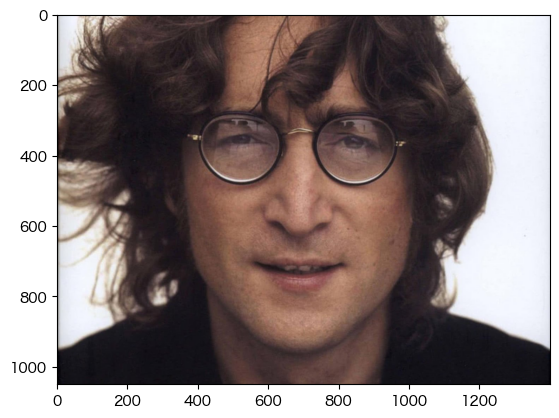

In [1]:
from PIL import Image, ImageDraw, ImageFilter 
import matplotlib.pyplot as plt
megane = Image.open("megane.jpeg")
lennon = Image.open("lennon.jpeg")
plt.imshow(megane)

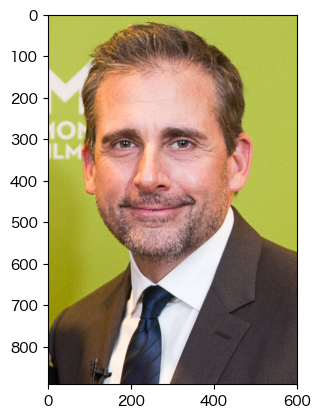

In [2]:
plt.imshow(lennon)

In [3]:
import cv2
import dlib
import numpy as np

detector = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor("shape_predictor_68_face_landmarks.dat")
megane = cv2.imread("megane.jpeg")
lennon = cv2.imread("lennon.jpeg")

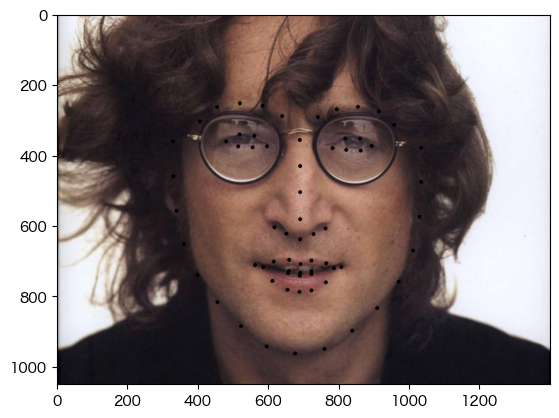

In [4]:
gray = cv2.cvtColor(megane, cv2.COLOR_BGR2GRAY)
rects = detector(gray, 1)
for rect in rects:
    meganep = Image.open("megane.jpeg")
    draw = ImageDraw.Draw(meganep)
    shape = predictor(gray, rect)
    shape_np = np.zeros((68, 2), dtype=int)
    for i in range(0, 68):
        shape_np[i] = (shape.part(i).x, shape.part(i).y)
    shape_megane = shape_np

    for i, (x, y) in enumerate(shape_megane):
        draw.ellipse((x-5, y-5, x + 5, y + 5), fill=(0, 0, 0))

plt.imshow(meganep)

In [5]:
print(shape_megane)

[[ 329  361]
 [ 330  460]
 [ 339  558]
 [ 360  652]
 [ 399  740]
 [ 455  817]
 [ 522  885]
 [ 595  943]
 [ 676  963]
 [ 759  950]
 [ 838  898]
 [ 909  834]
 [ 970  759]
 [1011  671]
 [1029  575]
 [1034  476]
 [1034  379]
 [ 405  304]
 [ 454  264]
 [ 519  253]
 [ 583  260]
 [ 639  289]
 [ 740  292]
 [ 794  270]
 [ 854  263]
 [ 914  276]
 [ 957  314]
 [ 689  357]
 [ 690  431]
 [ 690  505]
 [ 690  582]
 [ 617  605]
 [ 651  623]
 [ 690  639]
 [ 728  624]
 [ 762  608]
 [ 480  361]
 [ 518  341]
 [ 560  345]
 [ 596  375]
 [ 555  378]
 [ 514  375]
 [ 782  380]
 [ 818  353]
 [ 860  353]
 [ 893  374]
 [ 862  387]
 [ 821  385]
 [ 562  712]
 [ 615  702]
 [ 659  697]
 [ 691  709]
 [ 722  699]
 [ 764  707]
 [ 807  718]
 [ 763  761]
 [ 722  784]
 [ 688  788]
 [ 654  782]
 [ 611  757]
 [ 585  718]
 [ 658  729]
 [ 690  735]
 [ 722  730]
 [ 786  721]
 [ 722  737]
 [ 689  742]
 [ 656  735]]


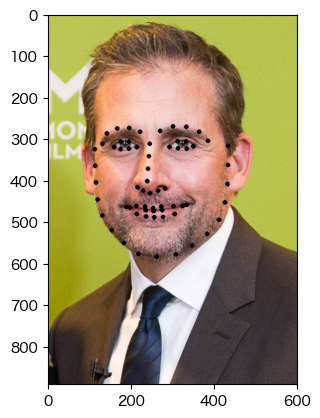

In [6]:
gray = cv2.cvtColor(lennon, cv2.COLOR_BGR2GRAY)
rects = detector(gray, 1)
for rect in rects:
    lennonp = Image.open("lennon.jpeg")
    draw = ImageDraw.Draw(lennonp)
    shape = predictor(gray, rect)
    shape_np = np.zeros((68, 2), dtype=int)
    for i in range(0, 68):
        shape_np[i] = (shape.part(i).x, shape.part(i).y)
    shape_lennon = shape_np

    for i, (x, y) in enumerate(shape_lennon):
        draw.ellipse((x-5, y-5, x + 5, y + 5), fill=(0, 0, 0))

plt.imshow(lennonp)

In [7]:
vec_megane = shape_megane[27, :] - shape_megane[30, :]
vec_lennon = shape_lennon[27, :] - shape_lennon[30, :]
theta = np.arccos(np.dot(vec_megane, vec_lennon)/(np.linalg.norm(vec_megane) * np.linalg.norm(vec_lennon)))
ratio = np.linalg.norm(vec_lennon) / np.linalg.norm(vec_megane)
mat = ratio * np.array([
    [np.cos(theta), -np.sin(theta)],
    [np.sin(theta), np.cos(theta)]
])
v = shape_megane - shape_megane[30, :]
l = []
for vec in v:
    l.append(mat @ vec)

l = np.array(l)
new_a = l + shape_lennon[30, :]
new_a

array([[ 99.93173468, 303.3596966 ],
       [ 97.51566389, 342.97562517],
       [ 98.32702564, 382.41923123],
       [104.05064591, 420.60466954],
       [117.14265397, 456.90285624],
       [137.34539565, 489.28597954],
       [162.20274167, 518.3831233 ],
       [189.74376802, 543.65219452],
       [221.56465057, 553.95362067],
       [255.12392842, 551.11610635],
       [288.19302335, 532.56974677],
       [318.40445621, 508.99735314],
       [344.93003595, 480.74191127],
       [363.82791451, 446.71923518],
       [373.75625173, 408.84336112],
       [378.57156402, 369.39809584],
       [381.33062063, 330.61035831],
       [131.94342828, 282.72863746],
       [152.67498914, 268.1274444 ],
       [178.97965472, 265.57768735],
       [204.37245684, 270.19721092],
       [225.94050488, 283.38640224],
       [266.24240509, 287.45885513],
       [288.46134397, 280.19760597],
       [312.65286612, 279.10512385],
       [336.27551061, 286.01011338],
       [352.38920713, 302.42839648],
 

In [8]:
new_a = new_a.astype(int)
for i in range(68):
    print(new_a[i], shape_lennon[i])

[ 99 303] [112 325]
[ 97 342] [113 365]
[ 98 382] [115 405]
[104 420] [119 446]
[117 456] [130 485]
[137 489] [153 520]
[162 518] [182 551]
[189 543] [217 577]
[221 553] [261 584]
[255 551] [307 578]
[288 532] [346 557]
[318 508] [382 529]
[344 480] [411 495]
[363 446] [425 453]
[373 408] [431 409]
[378 369] [432 363]
[381 330] [432 317]
[131 282] [130 312]
[152 268] [141 287]
[178 265] [166 275]
[204 270] [195 274]
[225 283] [221 283]
[266 287] [269 281]
[288 280] [300 270]
[312 279] [332 271]
[336 286] [363 283]
[352 302] [384 305]
[243 312] [244 312]
[242 341] [242 342]
[240 371] [240 372]
[238 402] [238 402]
[208 409] [215 417]
[221 417] [228 425]
[236 424] [245 431]
[252 419] [264 425]
[266 414] [281 419]
[160 307] [159 320]
[176 300] [174 307]
[192 303] [194 307]
[206 316] [213 320]
[189 316] [194 324]
[173 314] [174 325]
[280 323] [292 320]
[295 314] [311 306]
[312 315] [331 306]
[325 324] [349 318]
[312 328] [333 324]
[295 326] [312 323]
[183 450] [188 464]
[204 447] [212 462]


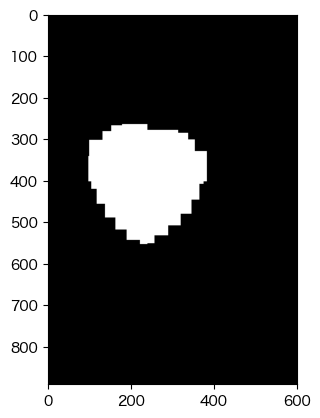

In [12]:
im = Image.new("L", lennonp.size, 0)
draw = ImageDraw.Draw(im)
for v in new_a:
    draw.rectangle((v[0], v[1], new_a[30, 0], new_a[30, 1]), fill=255)
plt.imshow(im, cmap="gray")

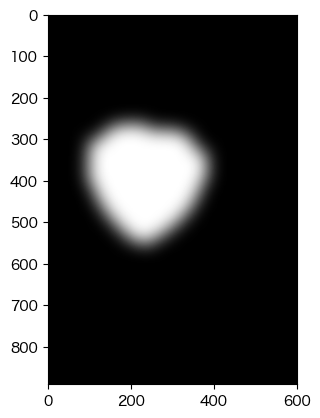

In [13]:
im_blur = im.filter(ImageFilter.GaussianBlur(20))
plt.imshow(im_blur, cmap="gray")

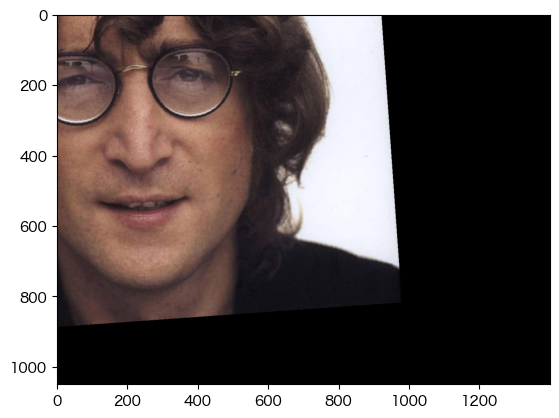

In [19]:
megane = Image.open("megane.jpeg")
meganep_rotate = megane.rotate(np.rad2deg(theta), center=(shape_megane[30, 0], shape_megane[30, 1]),
                                translate=(shape_lennon[30, 0] - shape_megane[30, 0], 
                                           shape_lennon[30, 1] - shape_megane[30, 1]))
plt.imshow(meganep_rotate)

In [20]:
back_im = Image.open("lennon.jpeg")
back_im.size

(601, 891)

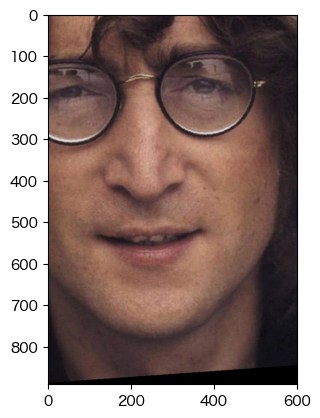

In [21]:
im_crop = meganep_rotate.crop((0, 0, back_im.size[0], back_im.size[1]))
plt.imshow(im_crop)

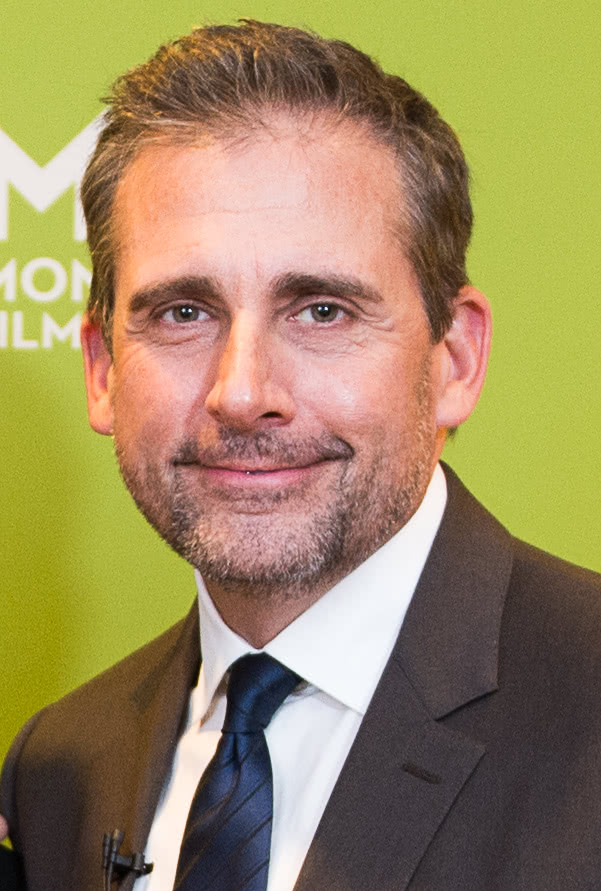

In [22]:
back_im.paste()